In [2]:
import pandas as pd

In [3]:
dataset = pd.read_csv("/home/countess/Documents/Studies/IX Semester/Mining/GetOldTweets-python/output_got.csv", sep=";",error_bad_lines=False)

b'Skipping line 1926: expected 10 fields, saw 12\nSkipping line 2998: expected 10 fields, saw 11\nSkipping line 5154: expected 10 fields, saw 11\nSkipping line 7511: expected 10 fields, saw 11\nSkipping line 10531: expected 10 fields, saw 11\nSkipping line 10658: expected 10 fields, saw 11\nSkipping line 11953: expected 10 fields, saw 11\nSkipping line 12597: expected 10 fields, saw 11\nSkipping line 12969: expected 10 fields, saw 11\nSkipping line 14775: expected 10 fields, saw 11\nSkipping line 15940: expected 10 fields, saw 11\nSkipping line 15999: expected 10 fields, saw 11\nSkipping line 16887: expected 10 fields, saw 11\nSkipping line 18595: expected 10 fields, saw 11\nSkipping line 19025: expected 10 fields, saw 11\nSkipping line 19288: expected 10 fields, saw 12\nSkipping line 21953: expected 10 fields, saw 11\nSkipping line 27653: expected 10 fields, saw 11\nSkipping line 32635: expected 10 fields, saw 11\nSkipping line 38693: expected 10 fields, saw 11\n'


In [4]:
import datetime
date_time_obj = datetime.datetime.strptime('2016-06-24 01:59', '%Y-%m-%d %H:%M')
date_time_obj

datetime.datetime(2016, 6, 24, 1, 59)

In [5]:
filtered = dataset.filter(items=['date', 'text'])

In [6]:
filtered['date'] = pd.to_datetime((filtered['date']))

In [7]:
tweets_20_21 = filtered.loc[filtered.date.between('2016-06-23 20', '2016-06-23 21')]['text']

In [8]:
tweets_21_22 = filtered.loc[filtered.date.between('2016-06-23 21', '2016-06-23 22')]['text']

In [9]:
tweets_22_23 = filtered.loc[filtered.date.between('2016-06-23 22', '2016-06-23 23')]['text']

In [10]:
tweets_23_00 = filtered.loc[filtered.date.between('2016-06-23 23', '2016-06-24 00')]['text']

In [24]:
tweets_00_01 = filtered.loc[filtered.date.between('2016-06-24 00', '2016-06-24 01')]['text']

In [27]:
tweets_01_02 = filtered.loc[filtered.date.between('2016-06-24 01', '2016-06-24 02')]['text']

In [11]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/countess/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [12]:
def nltk_sentiment(sentence):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    
    nltk_sentiment = SentimentIntensityAnalyzer()
    score = nltk_sentiment.polarity_scores(sentence)
    return score

In [13]:
def count_sentiment(tweets):
    positive = 0
    negative = 0
    neutral = 0
    for tweet in tweets:
        if nltk_sentiment(tweet)['compound'] > 0:
            positive += 1
        elif nltk_sentiment(tweet)['compound'] < 0:
            negative += 1
        else:
            neutral += 1
    return [positive, negative, neutral]

In [14]:
counts_20_21 = count_sentiment(tweets_20_21)

In [15]:
counts_21_22 = count_sentiment(tweets_21_22)

In [16]:
counts_22_23 = count_sentiment(tweets_22_23)

In [17]:
counts_23_00 = count_sentiment(tweets_23_00)

In [25]:
counts_00_01 = count_sentiment(tweets_00_01)

In [28]:
counts_01_02 = count_sentiment(tweets_01_02)

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

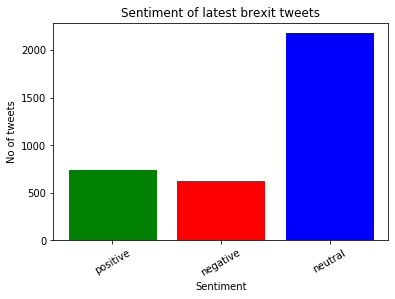

In [20]:
label = ['positive', 'negative', 'neutral']
index = np.arange(len(label))
def plot_bar_x(counts):
    # this is for plotting purpose
    index = np.arange(len(label))
    bar = plt.bar(index, counts)
    bar[0].set_color('g')
    bar[1].set_color('r')
    bar[2].set_color('b')
    plt.xlabel('Sentiment', fontsize=10)
    plt.ylabel('No of tweets', fontsize=10)
    plt.xticks(index, label, fontsize=10, rotation=30)
    plt.title('Sentiment of latest brexit tweets')
    plt.show()

plot_bar_x(counts_20_21)

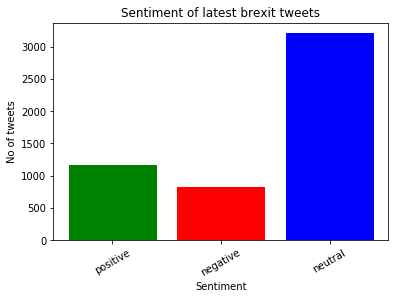

In [21]:
plot_bar_x(counts_21_22)

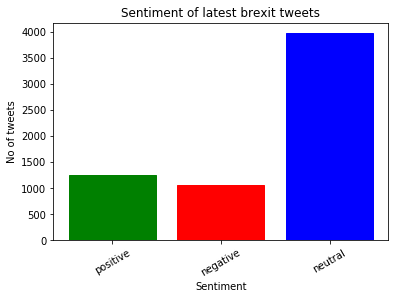

In [22]:
plot_bar_x(counts_22_23)

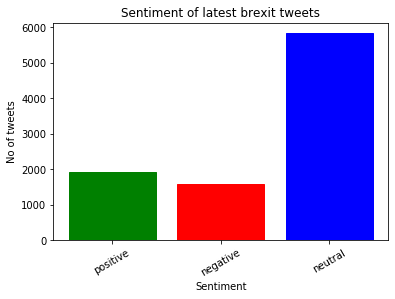

In [23]:
plot_bar_x(counts_23_00)

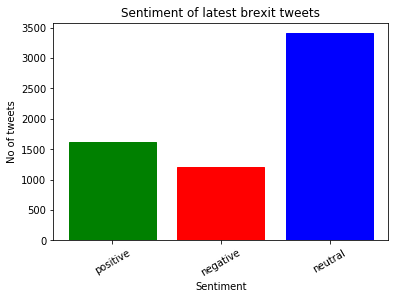

In [26]:
plot_bar_x(counts_00_01)

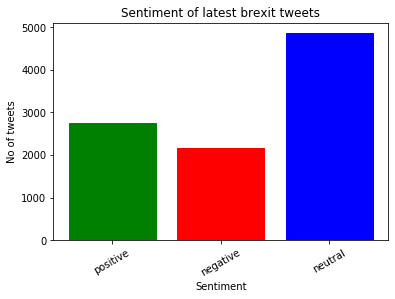

In [29]:
plot_bar_x(counts_01_02)